In [1]:
from utils import *

grid_rf = {
    'n_estimators': [100, 200, 300],
     'max_depth': [10, 20, 30],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]
}

grid_xgb = {
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'max_leaves': [5, 20, 100]
}

# Caso
caso = 'julieta'

dataset = pd.read_csv(f'dataset_{caso}.csv')
dataset

gender  sel_Ind1  sel_Grup  sel_Ind2  \
0        M         3         2         2   
1        F         2         3         2   
2        F         3         4         4   
3        M         4         5         4   
4        F         6         5         5   
..     ...       ...       ...       ...   
699      M         4         4         4   
700      F         5         5         5   
701      F         2         4         2   
702      M         6         3         4   
703      M         5         4         4   

                                          comment_Ind1  \
0    idealmente , debería copiar prueba . considero...   
1    debiera usar información grupo whatsapp , pues...   
2    julieta momento realizando prueba , examina co...   
3    dependiendo contexto julieta mencioné anterior...   
4    creo pierde mas copiando través whatsapp ganan...   
..                                                 ...   
699  depende comporten compañeros frente situacion ...   
700  mayoritariamente creo julieta debería copiar p...   
701  pues puede copiar ahora mantener beca , puede ...   
702  juicio moral , pone riesgo peligro sabe experi...   
703       usarla podrian decubrirla podria perder beca   

                                          comment_Grup  \
0    habló grupo consideraciones económicas , socia...   
1    mejor opción julieta usar información , pues b...   
2    actividad especifican si prueba define mantenc...   
3    personalmente insisto sigue dependiendo contex...   
4    grupo , elegimos numero 5 debería copiar , exi...   
..                                                 ...   
699                             depende comporte resto   
700  creo debería copiar , moralmente correcto opin...   
701  puede copiar mantener beca , embargo copiar fi...   
702  considerando beca significa carrera , ciertas ...   
703  puede llegar copiar pasar desapercibida tambie...   

                                          comment_Ind2  \
0    opinión cambió aún hacia usar información . co...   
1    sigue igual , pues grupo menos misma opinión ....   
2    sabemos situación encuentra julieta , capacida...   
3    posición sigue igual , depende contexto juliet...   
4    luego tener conversación grupo , cambiado 6 5 ...   
..                                                 ...   
699       misma existen posibles casos respuesta reves   
700  grupo coincidimos opiniones , julieta recomend...   
701  pues si pierde beca puede seguir estudiando , ...   
702  si carrera dependiente beca , replantearía cop...   
703  podria hojear respuesta ver cambiar partes dif...   

                                               summary  
0    que ella necesita la nota que necesita para la...  
1    hola hola yo creo que s tiene que copiar yo ta...  
2    La verdad es que no Me entró la duda Podemos p...  
3    en la copia s que lo debera evitar en lo posib...  
4    creo que si creo que si creo que si creo que s...  
..                                                 ...  
699  :( que vamos a poner entonce s lo de médico es...  
700  que copie solo ante extrema necesidad, pero qu...  
701  ya lo pusiste que segn yo no es copia copia, p...  
702  XD La 3 era que podia perder la beca y el trab...  
703  eso creo yo á eso creo yo yo le puse 6 pensand...  

[704 rows x 8 columns]

# Modelos clásicos

## Modelo base

In [2]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=False, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  Ind1__1  Ind1__10  Ind1__100  Ind1__110  Ind1__2  \
229       5.0       1.0        0         0          0          0        0   
700       4.0       4.0        0         0          0          0        0   
572       5.0       4.0        0         0          0          0        0   
436       1.0       1.0        0         0          0          0        0   
124       3.0       3.0        0         0          0          0        0   
..        ...       ...      ...       ...        ...        ...      ...   
26        5.0       3.0        0         0          0          0        0   
340       3.0       3.0        0         0          0          0        0   
17        0.0       3.0        0         0          0          0        0   
667       1.0       2.0        0         0          0          0        0   
608       0.0       4.0        0         0          0          0        0   

     Ind1__20  Ind1__3  Ind1__4  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229         0        0        0  ...           0           0          0   
700         0        0        0  ...           0           0          0   
572         0        0        0  ...           0           0          0   
436         0        0        0  ...           0           0          0   
124         0        0        0  ...           0           0          0   
..        ...      ...      ...  ...         ...         ...        ...   
26          0        0        0  ...           0           0          0   
340         0        0        0  ...           0           0          0   
17          0        0        0  ...           0           0          0   
667         0        0        0  ...           0           0          0   
608         0        0        0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 5888 columns]

In [3]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2'])])

In [4]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AEC352710>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AEC352710>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AEC352710>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AEC352710>),
                                 'summary')])

In [5]:
df_train

sel_Ind1  sel_Grup  Ind1__1  Ind1__10  Ind1__100  Ind1__110  Ind1__2  \
229       5.0       1.0        0         0          0          0        0   
700       4.0       4.0        0         0          0          0        0   
572       5.0       4.0        0         0          0          0        0   
436       1.0       1.0        0         0          0          0        0   
124       3.0       3.0        0         0          0          0        0   
..        ...       ...      ...       ...        ...        ...      ...   
26        5.0       3.0        0         0          0          0        0   
340       3.0       3.0        0         0          0          0        0   
17        0.0       3.0        0         0          0          0        0   
667       1.0       2.0        0         0          0          0        0   
608       0.0       4.0        0         0          0          0        0   

     Ind1__20  Ind1__3  Ind1__4  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229         0        0        0  ...           0           0          0   
700         0        0        0  ...           0           0          0   
572         0        0        0  ...           0           0          0   
436         0        0        0  ...           0           0          0   
124         0        0        0  ...           0           0          0   
..        ...      ...      ...  ...         ...         ...        ...   
26          0        0        0  ...           0           0          0   
340         0        0        0  ...           0           0          0   
17          0        0        0  ...           0           0          0   
667         0        0        0  ...           0           0          0   
608         0        0        0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 5888 columns]

In [6]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        56
         0.0       0.00      0.00      0.00        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.40       141
   macro avg       0.13      0.33      0.19       141
weighted avg       0.16      0.40      0.23       141

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

        -1.0       0.63      0.84      0.72        56
         0.0       0.49      0.59      0.54        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.56       141
   macro avg       0.37      0.48      0.42       141
weighted avg       0.44      0.56      0.49       141

XGBoost classifier
Best Hyperparameters: {'max_leaves': 20, 'min_child_weight': 1, 'n_es

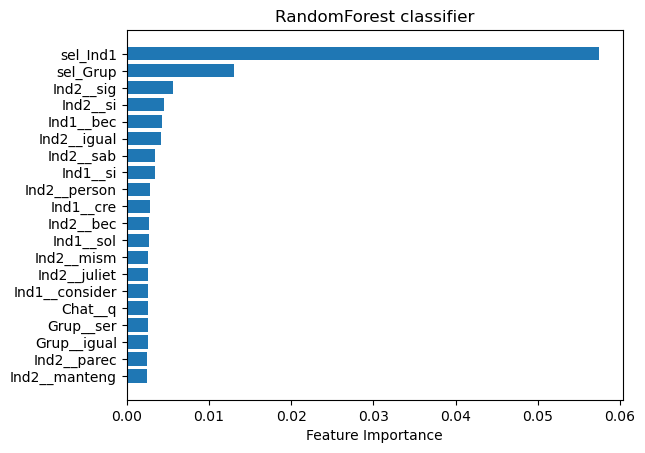

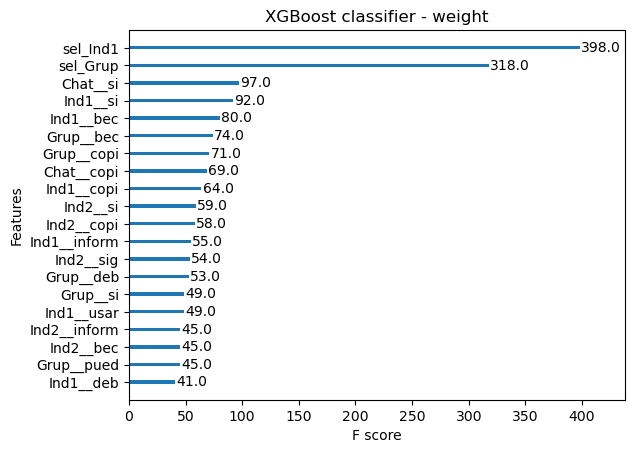

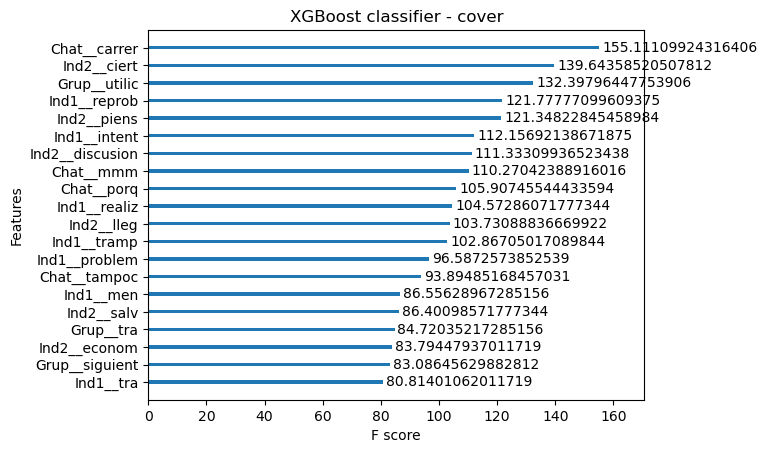

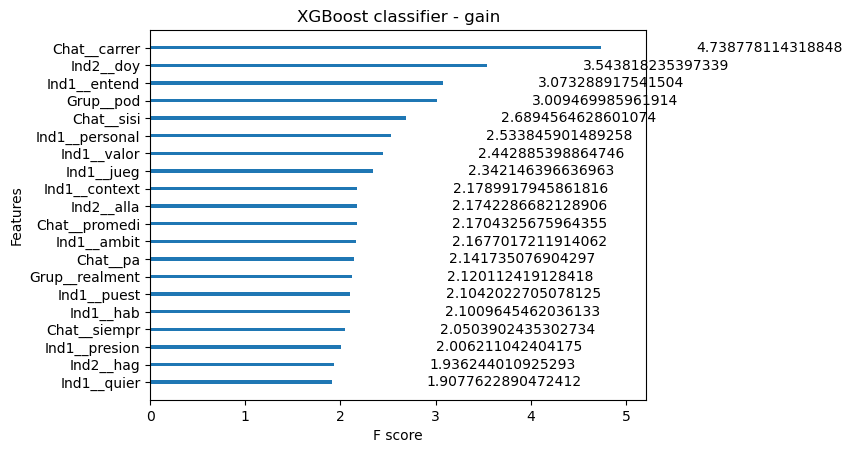

In [7]:
plot_importance_models(rf_best_model, xgb_best_model)

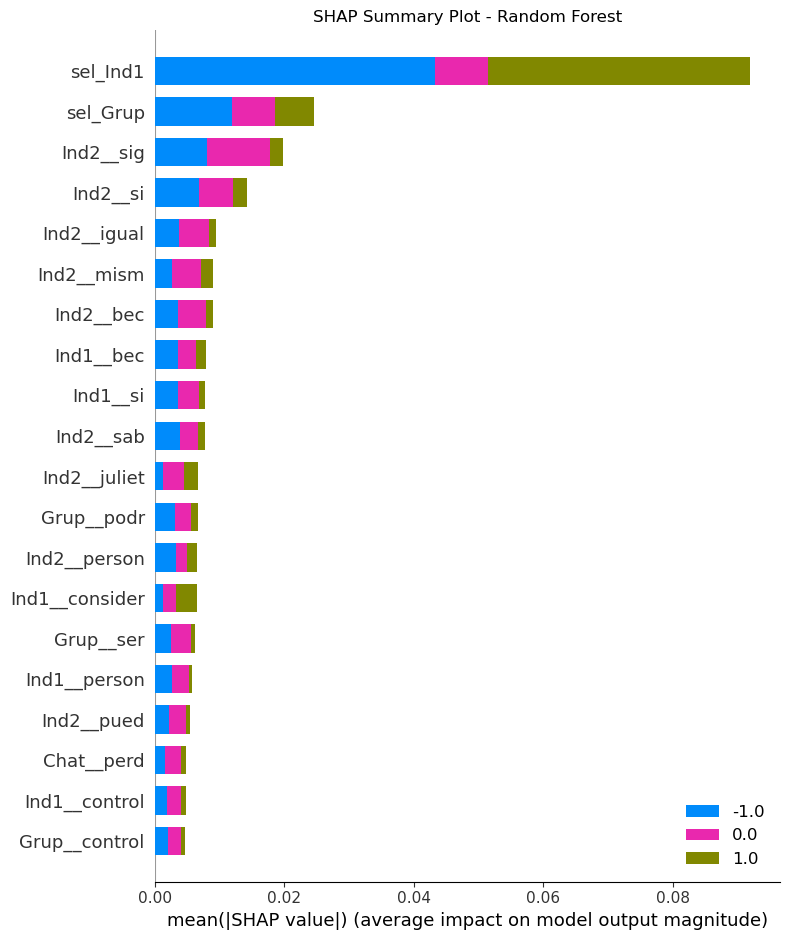

In [8]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[03:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


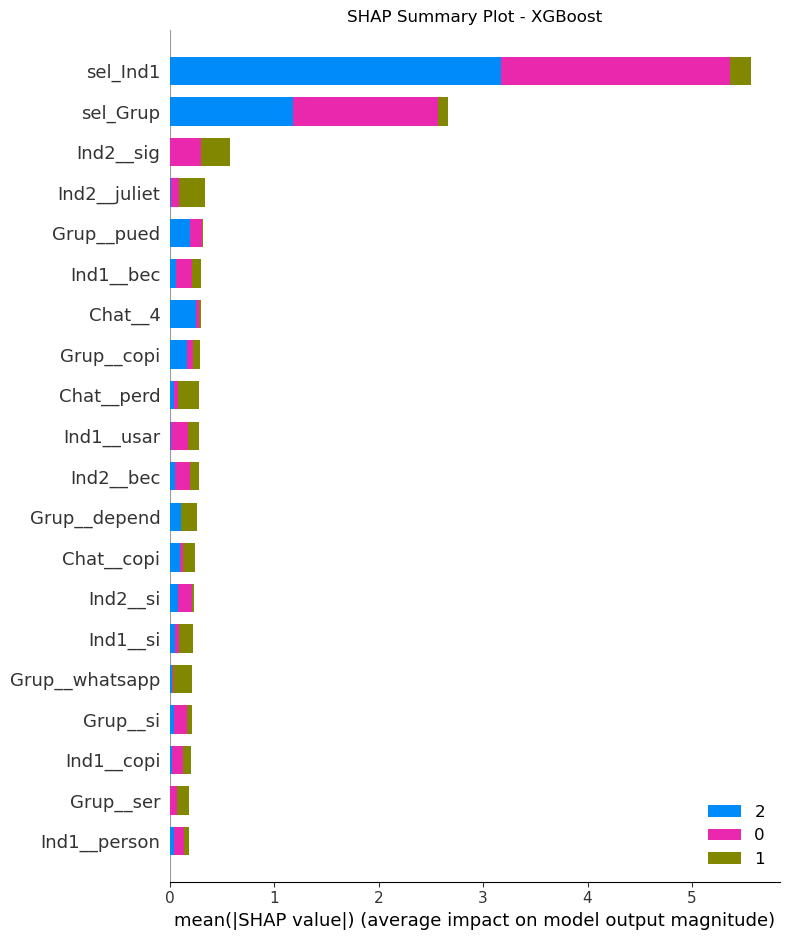

In [9]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

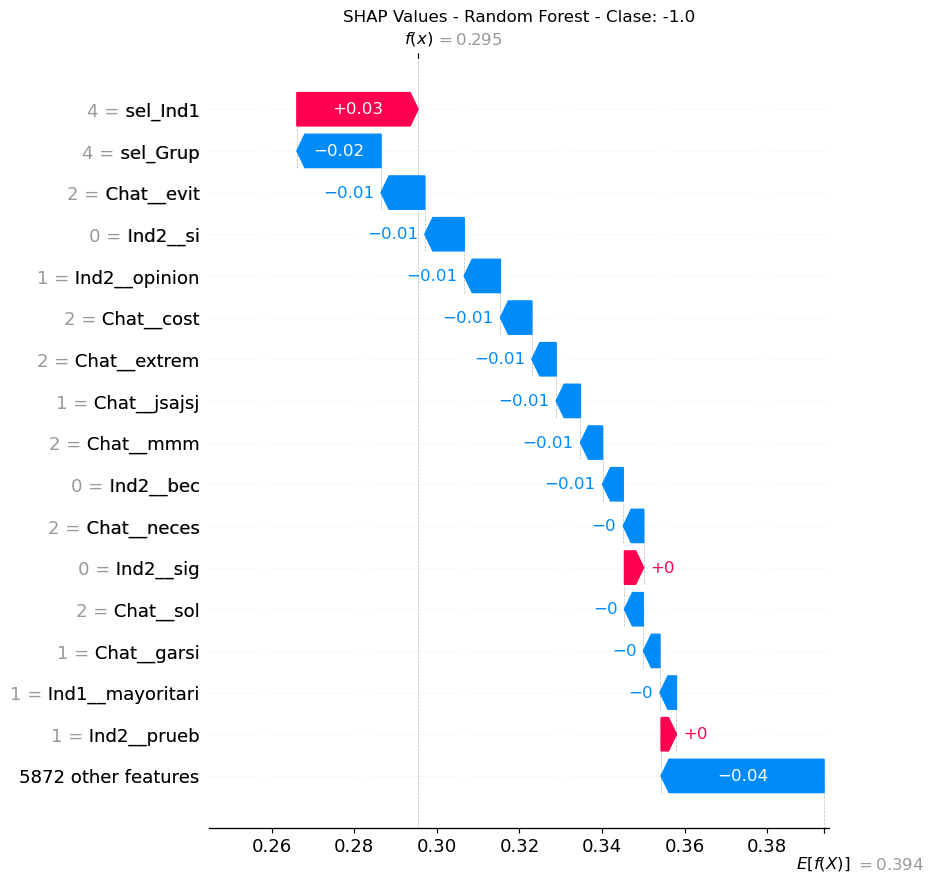

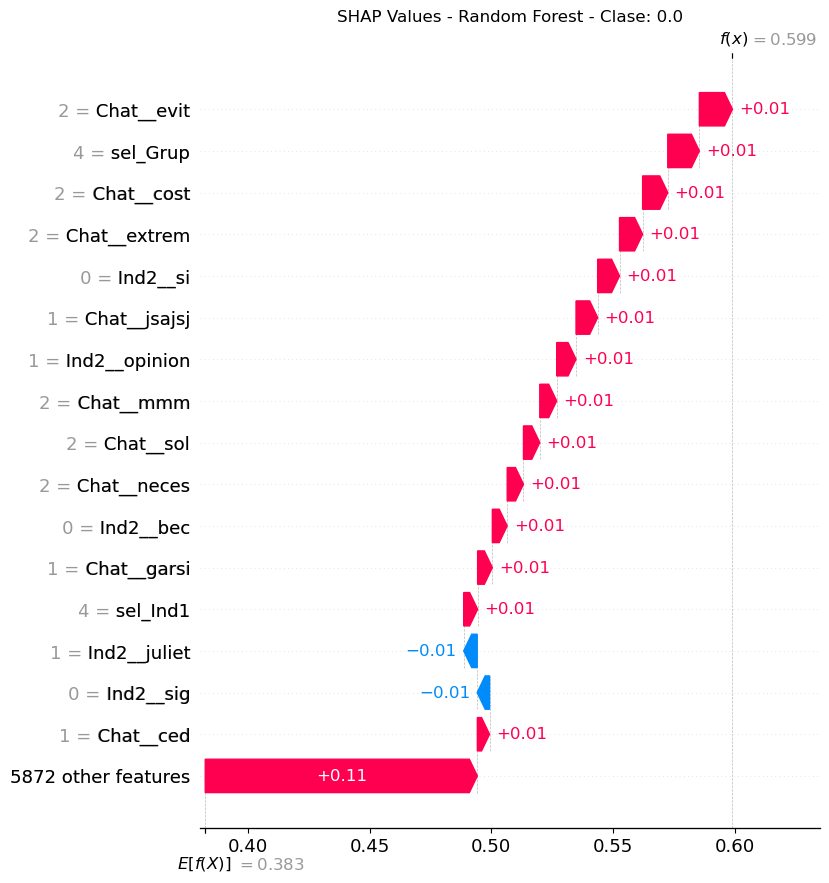

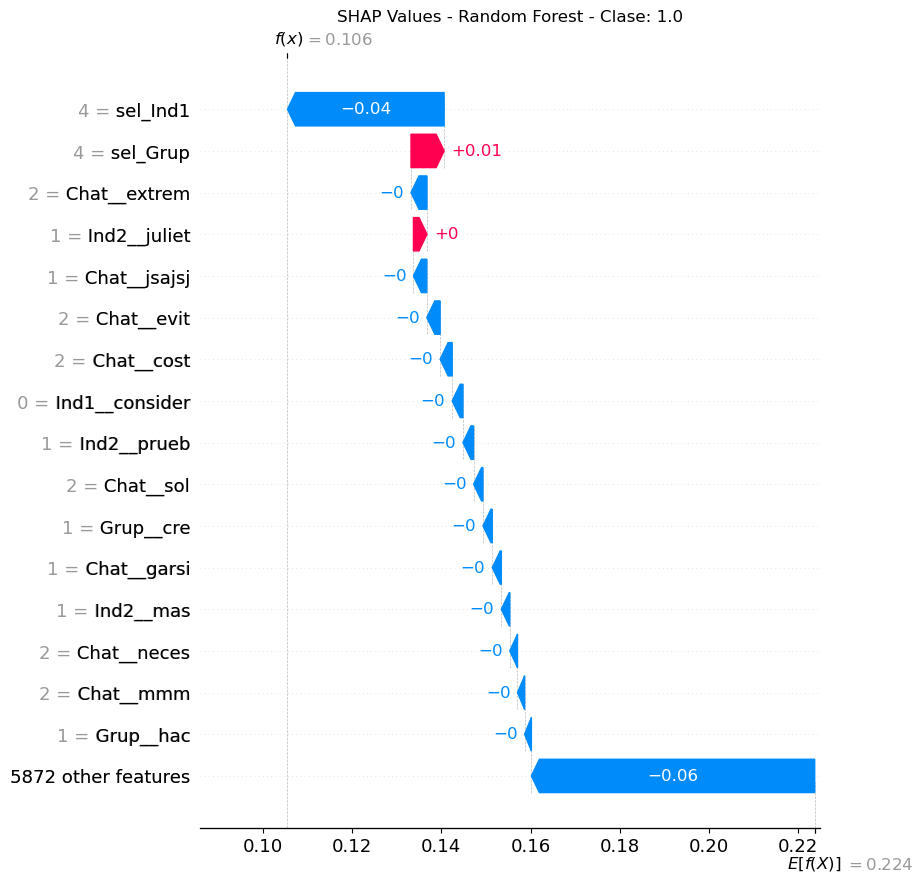

In [10]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[03:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


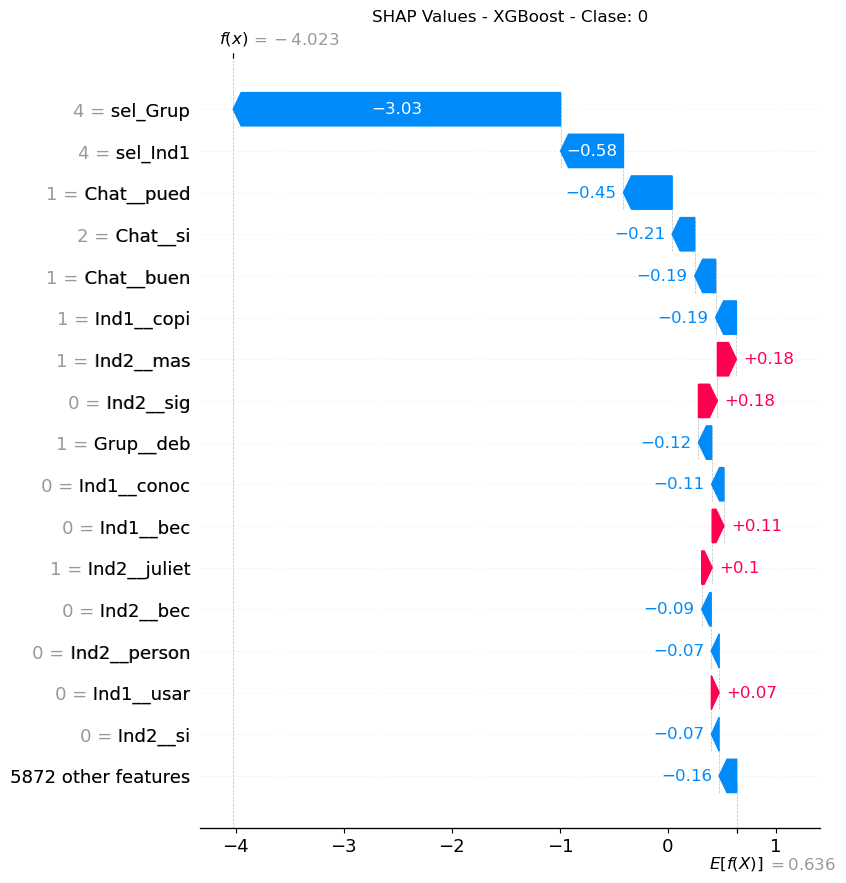

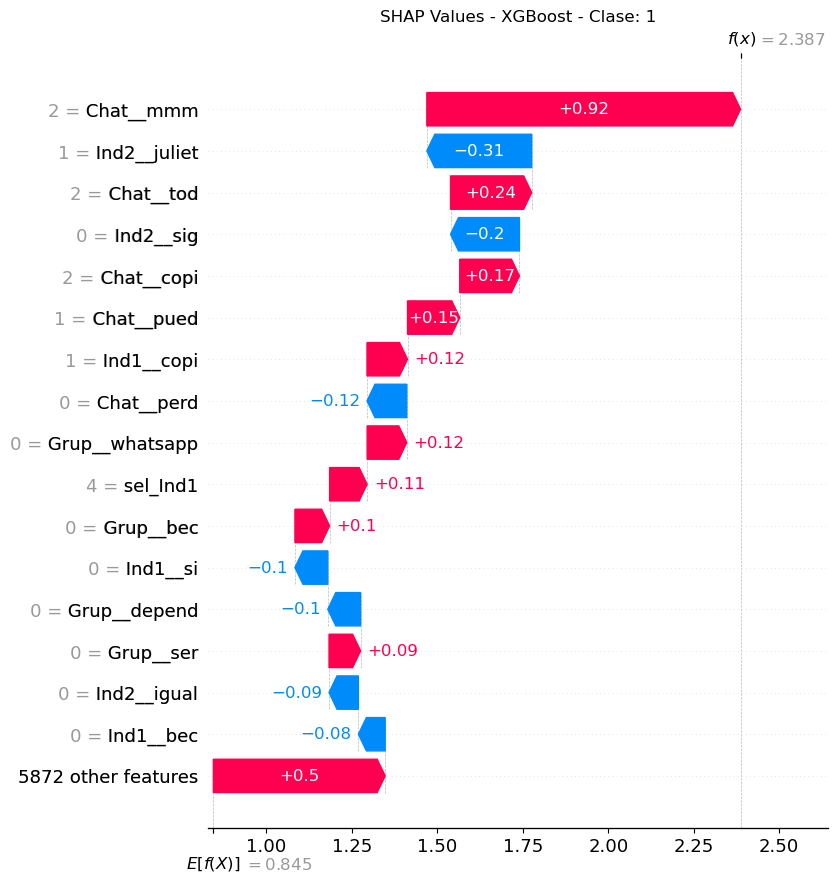

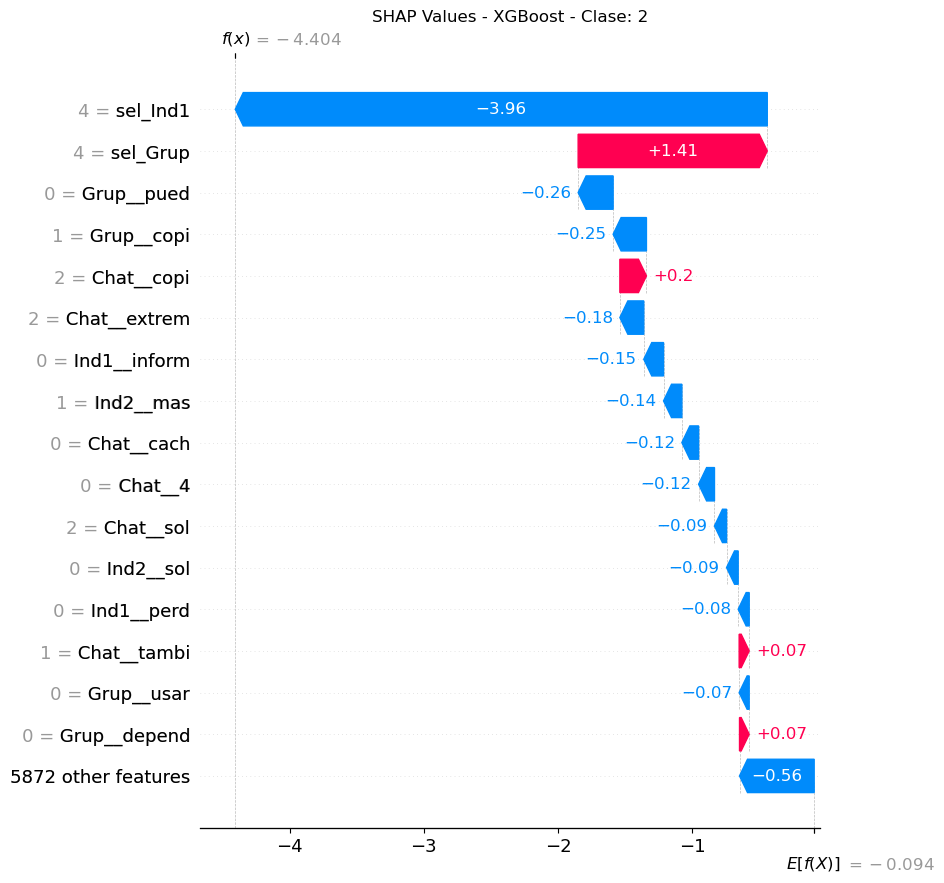

In [11]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 2. Agregar género

In [12]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=True, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  gender:M  gender:F  gender:O  Ind1__1  Ind1__10  \
229       5.0       1.0       1.0       0.0       0.0        0         0   
700       4.0       4.0       0.0       1.0       0.0        0         0   
572       5.0       4.0       1.0       0.0       0.0        0         0   
436       1.0       1.0       1.0       0.0       0.0        0         0   
124       3.0       3.0       1.0       0.0       0.0        0         0   
..        ...       ...       ...       ...       ...      ...       ...   
26        5.0       3.0       1.0       0.0       0.0        0         0   
340       3.0       3.0       1.0       0.0       0.0        0         0   
17        0.0       3.0       1.0       0.0       0.0        0         0   
667       1.0       2.0       1.0       0.0       0.0        0         0   
608       0.0       4.0       0.0       1.0       0.0        0         0   

     Ind1__100  Ind1__110  Ind1__2  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229          0          0        0  ...           0           0          0   
700          0          0        0  ...           0           0          0   
572          0          0        0  ...           0           0          0   
436          0          0        0  ...           0           0          0   
124          0          0        0  ...           0           0          0   
..         ...        ...      ...  ...         ...         ...        ...   
26           0          0        0  ...           0           0          0   
340          0          0        0  ...           0           0          0   
17           0          0        0  ...           0           0          0   
667          0          0        0  ...           0           0          0   
608          0          0        0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 5891 columns]

In [13]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [14]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94212A40>),
                                 'summary')])

In [15]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        56
         0.0       0.00      0.00      0.00        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.40       141
   macro avg       0.13      0.33      0.19       141
weighted avg       0.16      0.40      0.23       141

Random Forest classifier
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

        -1.0       0.55      0.79      0.65        56
         0.0       0.43      0.48      0.46        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.50       141
   macro avg       0.33      0.42      0.37       141
weighted avg       0.38      0.50      0.43       141

XGBoost classifier
Best Hyperparameters: {'max_leaves': 100, 'min_child_weight': 3, 'n_e

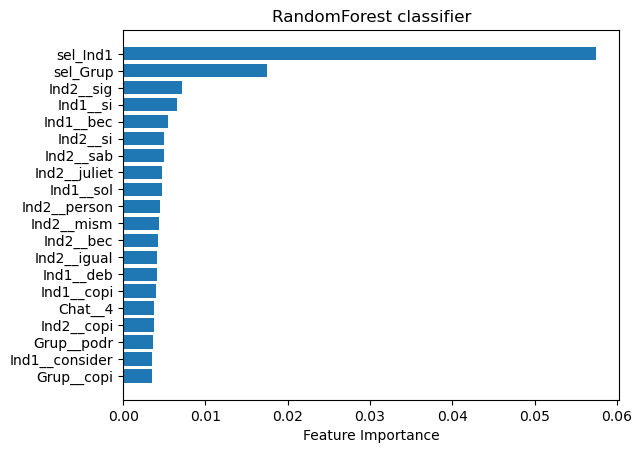

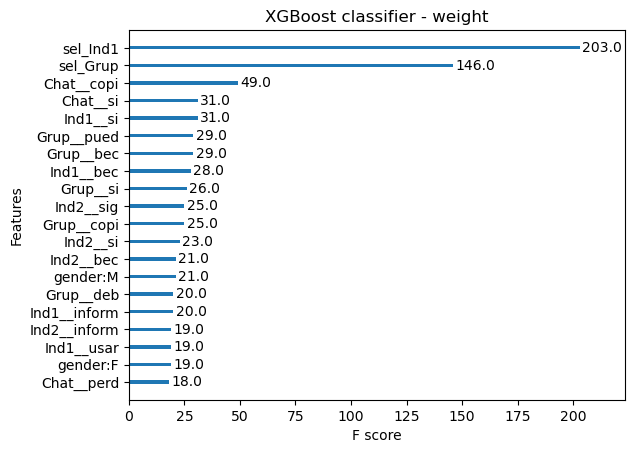

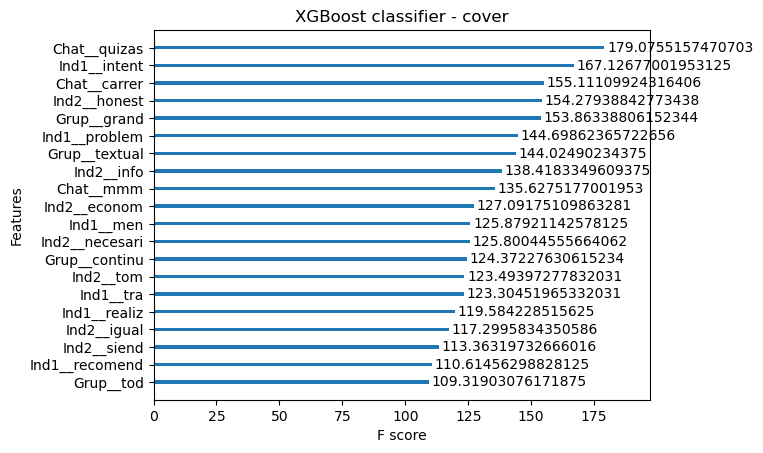

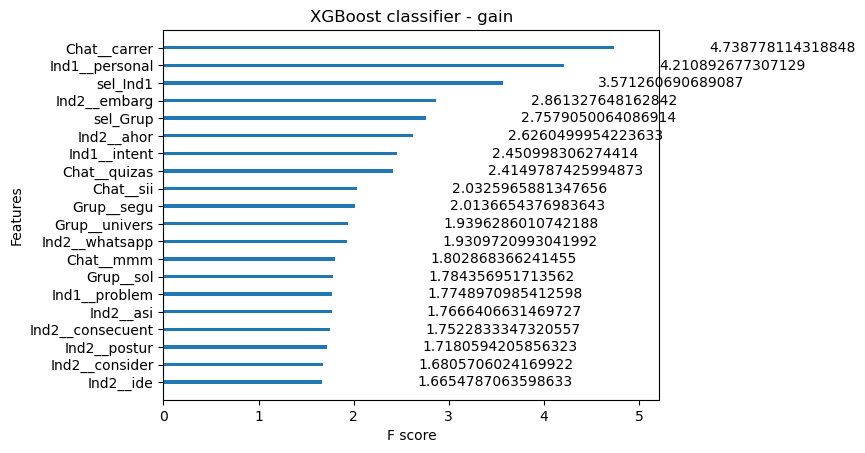

In [16]:
plot_importance_models(rf_best_model, xgb_best_model)

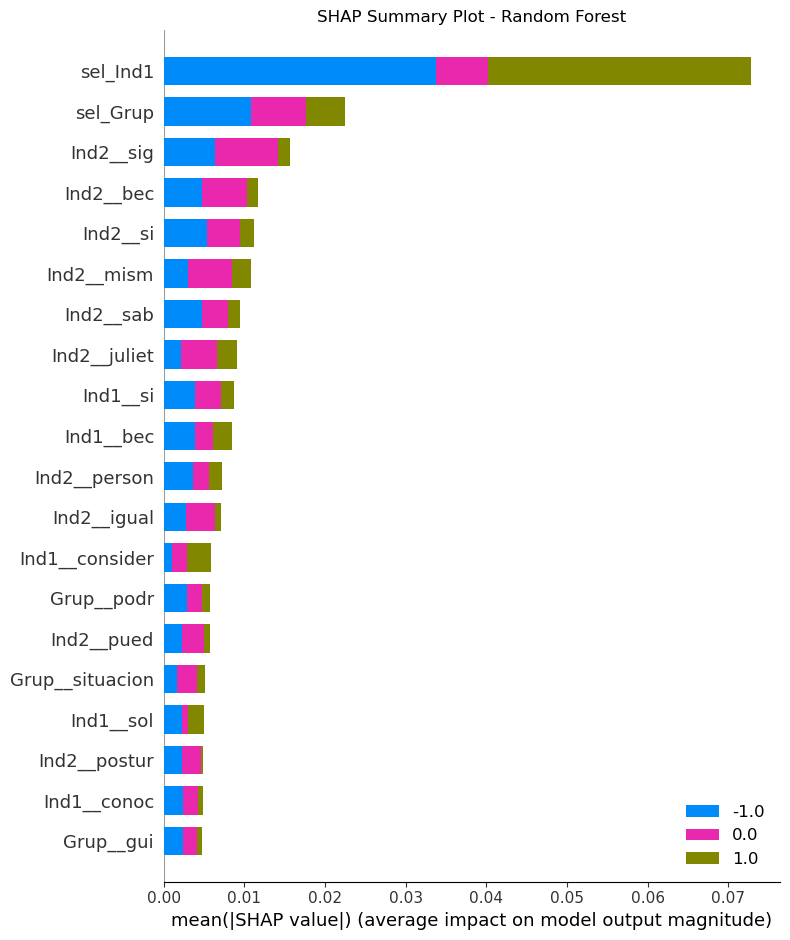

In [17]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[03:24:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


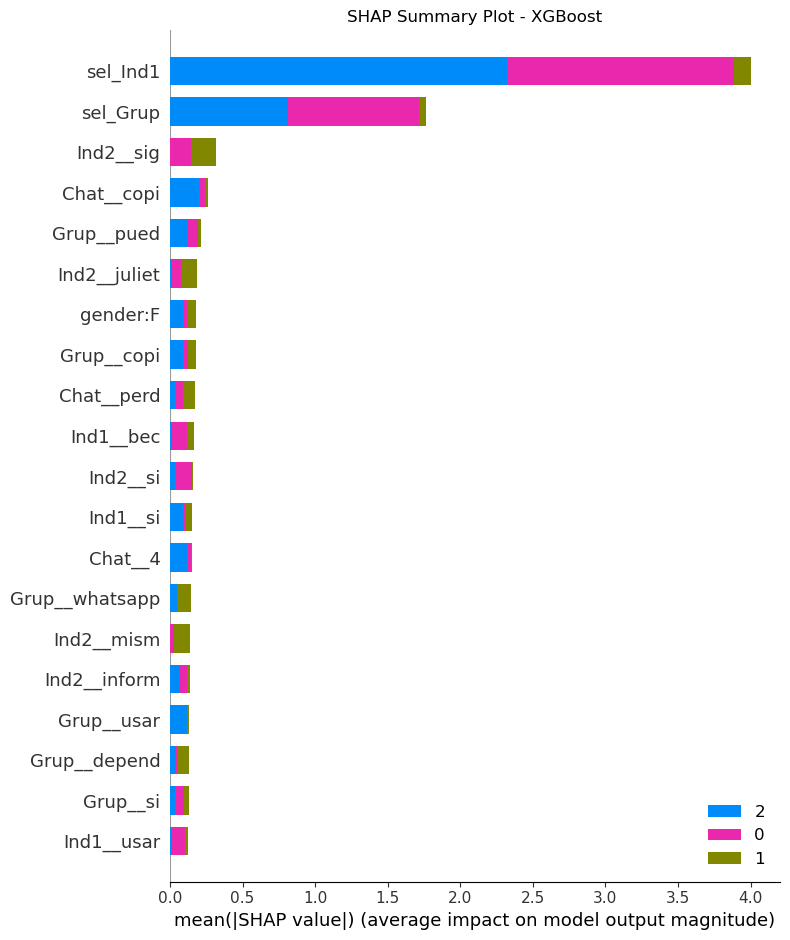

In [18]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

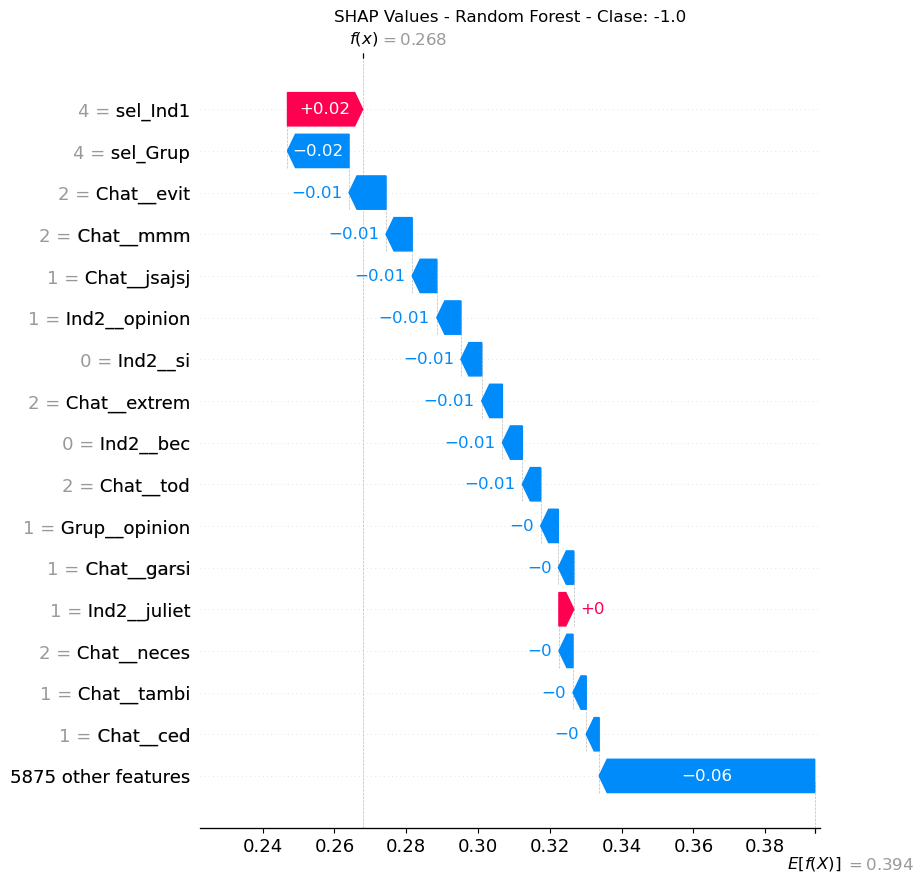

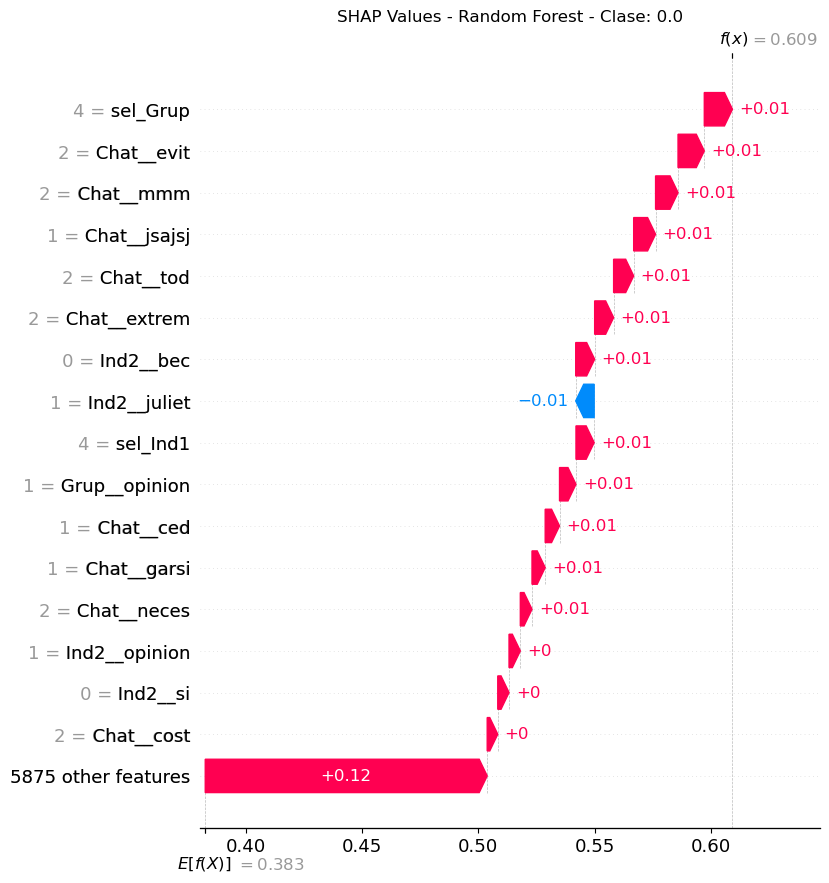

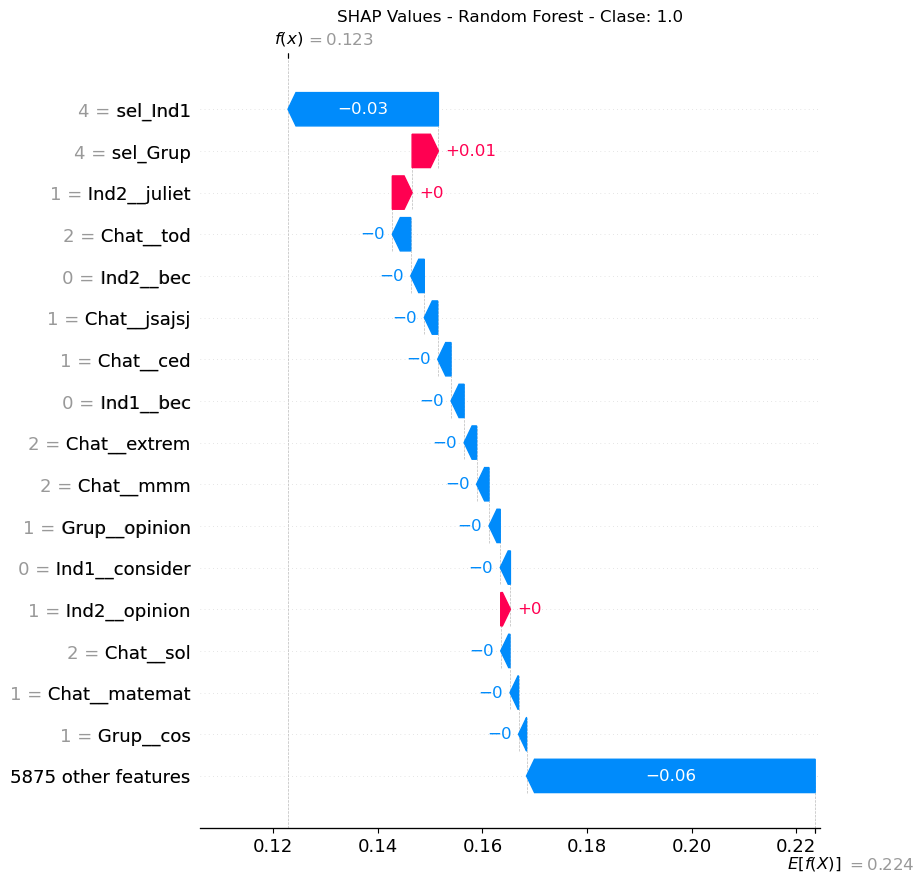

In [19]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[03:24:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


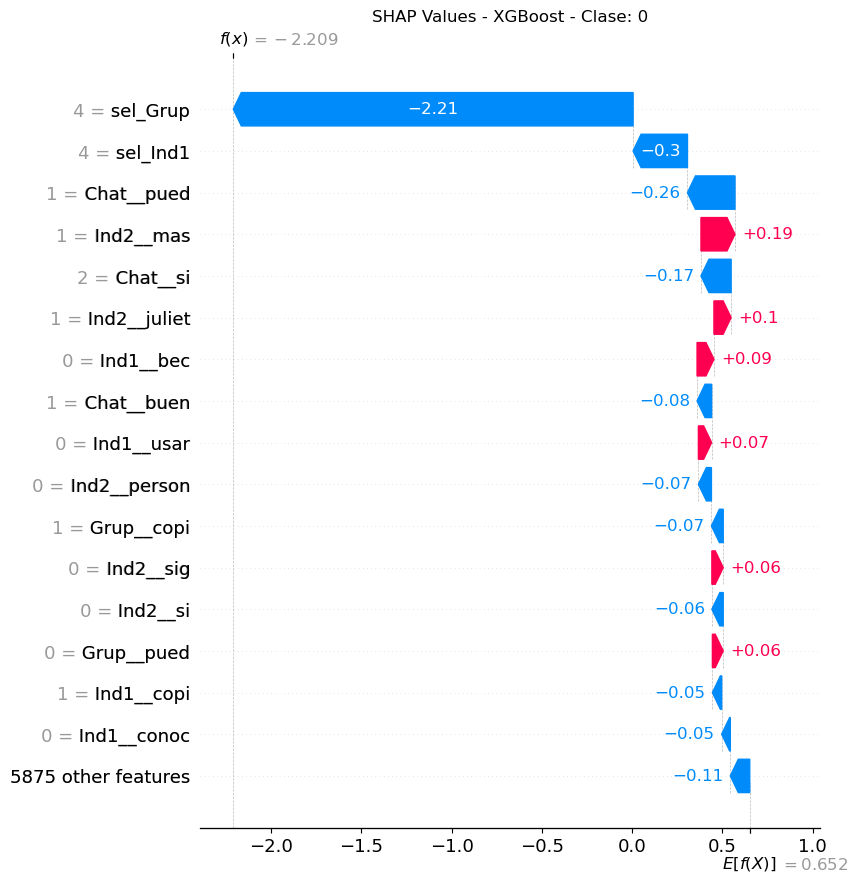

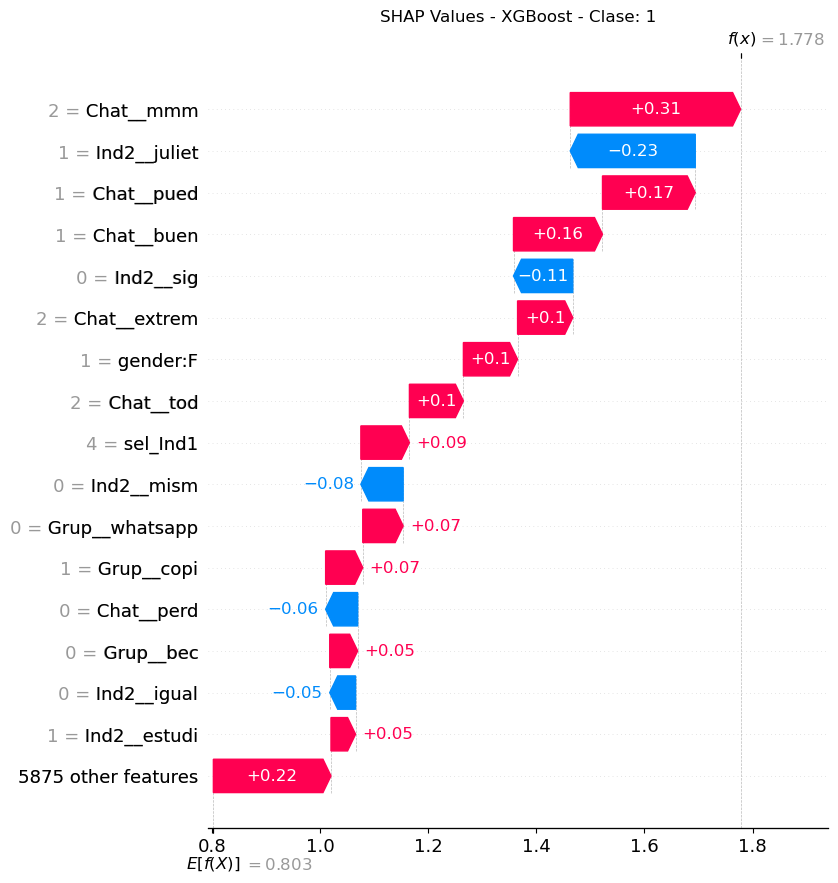

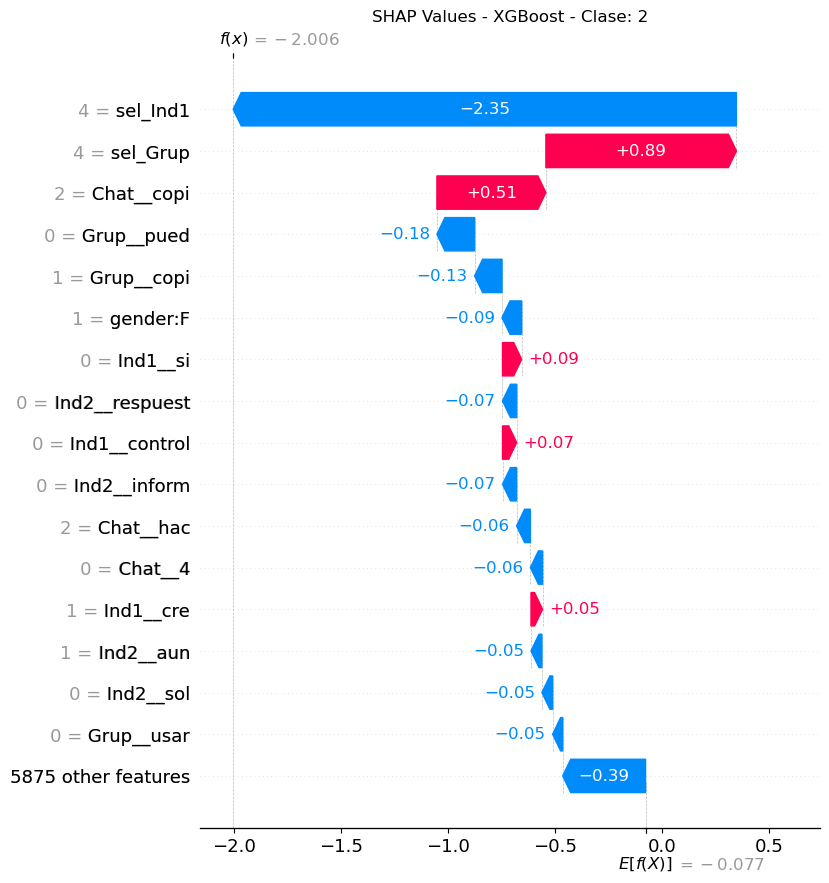

In [20]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 3. Quitar selección 1

In [21]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=True, 
    sel_Ind1=False
)
df_train

sel_Grup  gender:M  gender:F  gender:O  Ind1__1  Ind1__10  Ind1__100  \
229       1.0       1.0       0.0       0.0        0         0          0   
700       4.0       0.0       1.0       0.0        0         0          0   
572       4.0       1.0       0.0       0.0        0         0          0   
436       1.0       1.0       0.0       0.0        0         0          0   
124       3.0       1.0       0.0       0.0        0         0          0   
..        ...       ...       ...       ...      ...       ...        ...   
26        3.0       1.0       0.0       0.0        0         0          0   
340       3.0       1.0       0.0       0.0        0         0          0   
17        3.0       1.0       0.0       0.0        0         0          0   
667       2.0       1.0       0.0       0.0        0         0          0   
608       4.0       0.0       1.0       0.0        0         0          0   

     Ind1__110  Ind1__2  Ind1__20  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229          0        0         0  ...           0           0          0   
700          0        0         0  ...           0           0          0   
572          0        0         0  ...           0           0          0   
436          0        0         0  ...           0           0          0   
124          0        0         0  ...           0           0          0   
..         ...      ...       ...  ...         ...         ...        ...   
26           0        0         0  ...           0           0          0   
340          0        0         0  ...           0           0          0   
17           0        0         0  ...           0           0          0   
667          0        0         0  ...           0           0          0   
608          0        0         0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 5890 columns]

In [22]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [23]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AFD55AC80>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AFD55AC80>),
                                 'comment_Grup'),
                                ('Ind2',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AFD55AC80>),
                                 'comment_Ind2'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027AFD55AC80>),
                                 'summary')])

In [24]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        56
         0.0       0.00      0.00      0.00        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.40       141
   macro avg       0.13      0.33      0.19       141
weighted avg       0.16      0.40      0.23       141

Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

        -1.0       0.48      0.66      0.56        56
         0.0       0.44      0.52      0.47        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.46       141
   macro avg       0.31      0.39      0.34       141
weighted avg       0.36      0.46      0.40       141

XGBoost classifier
Best Hyperparameters: {'max_leaves': 5, 'min_child_weight': 5, 'n_est

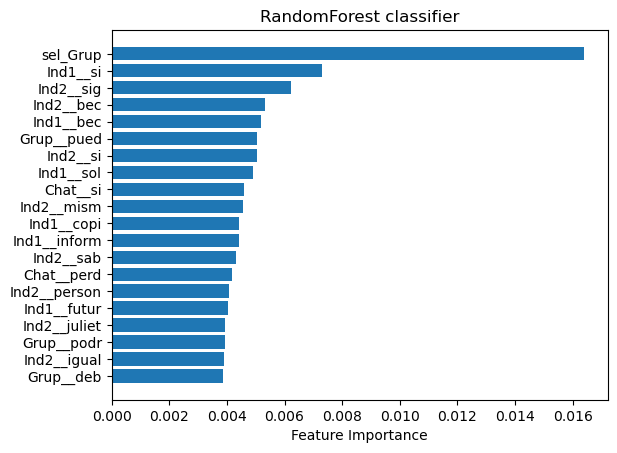

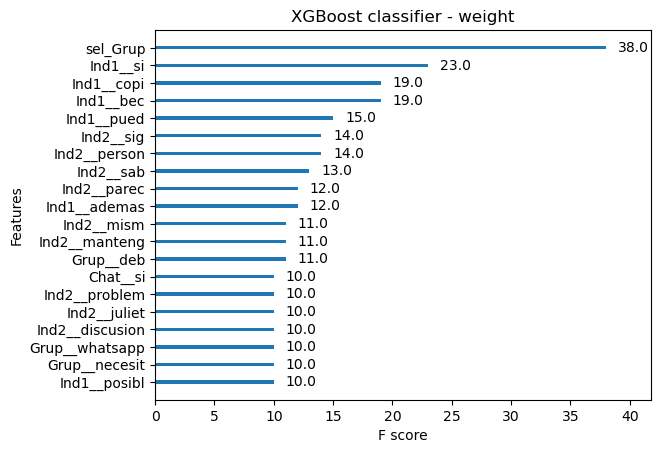

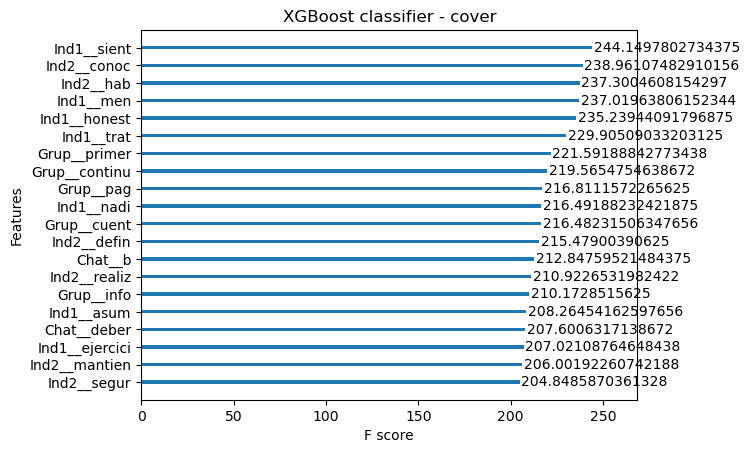

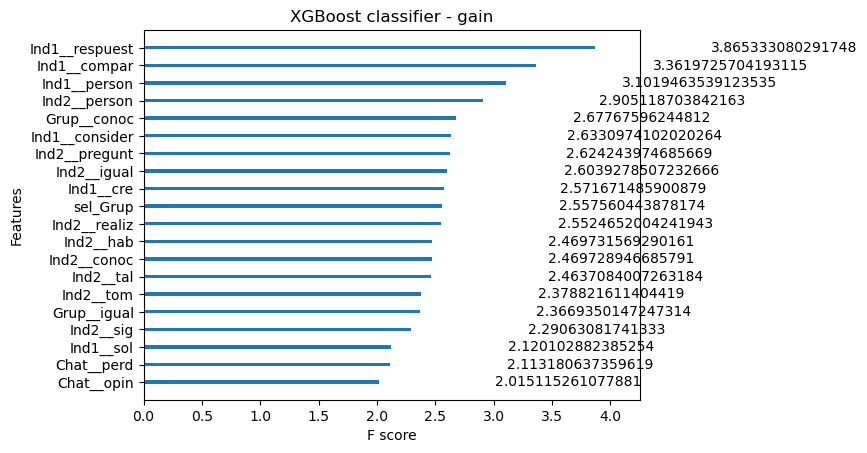

In [25]:
plot_importance_models(rf_best_model, xgb_best_model)

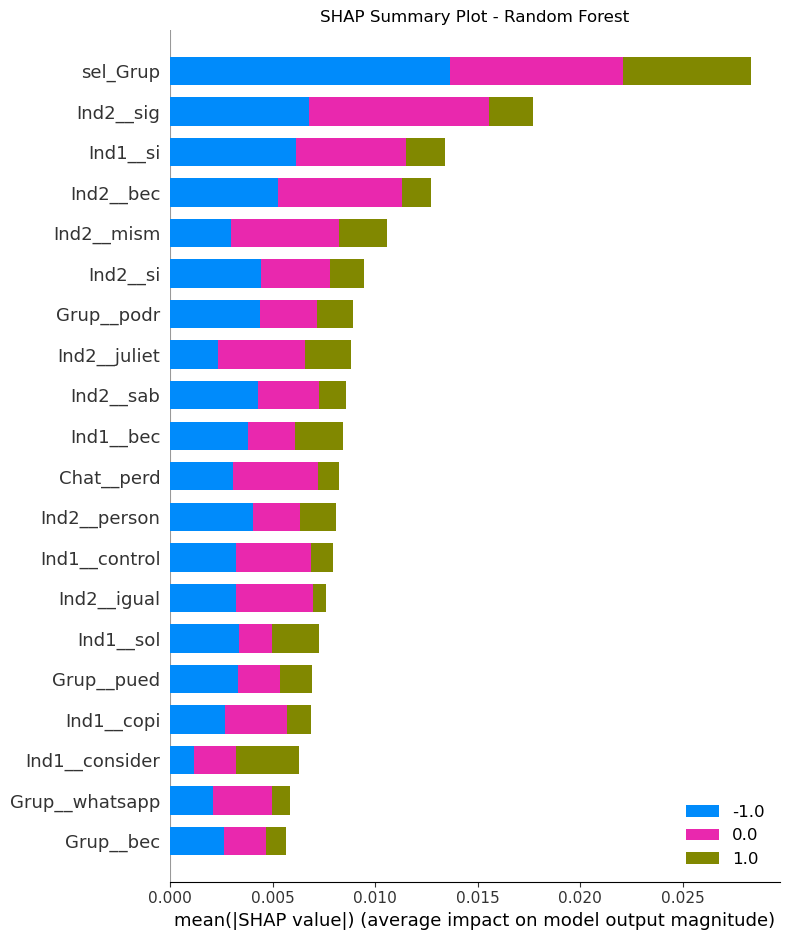

In [26]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[03:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


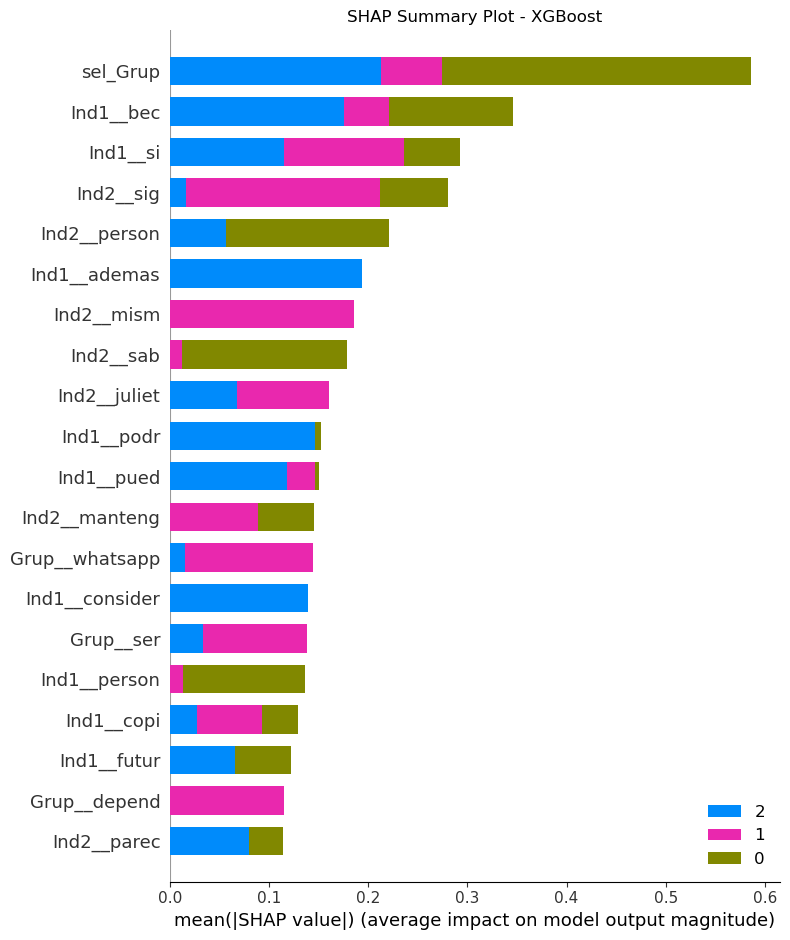

In [27]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

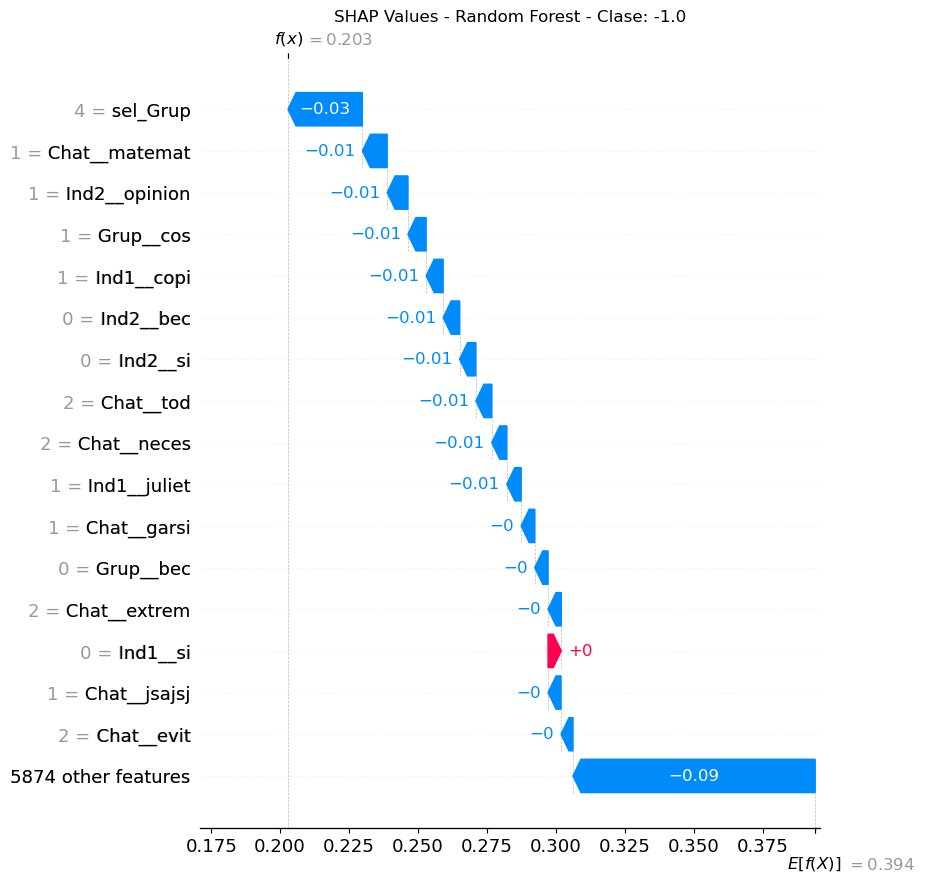

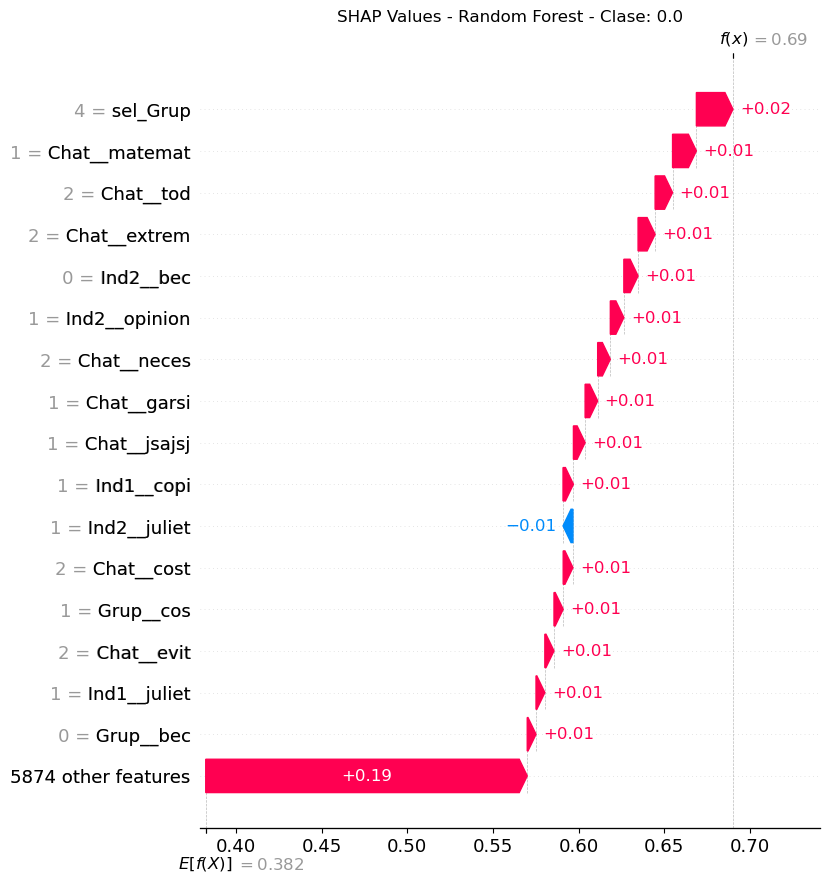

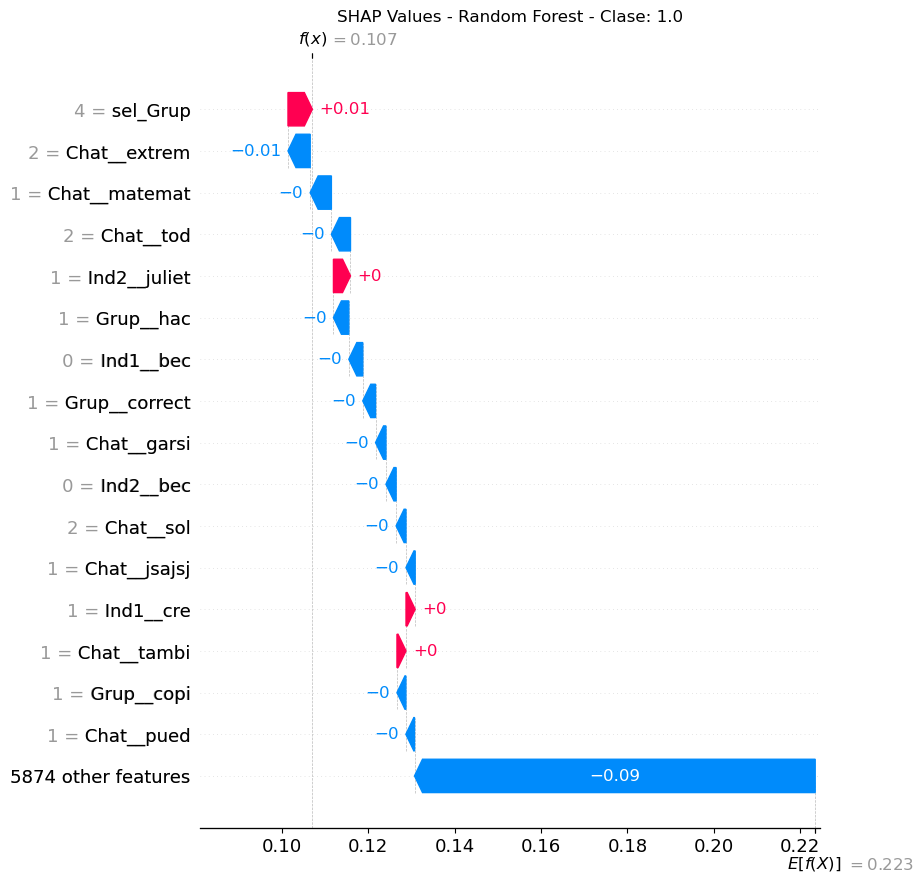

In [28]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[03:34:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


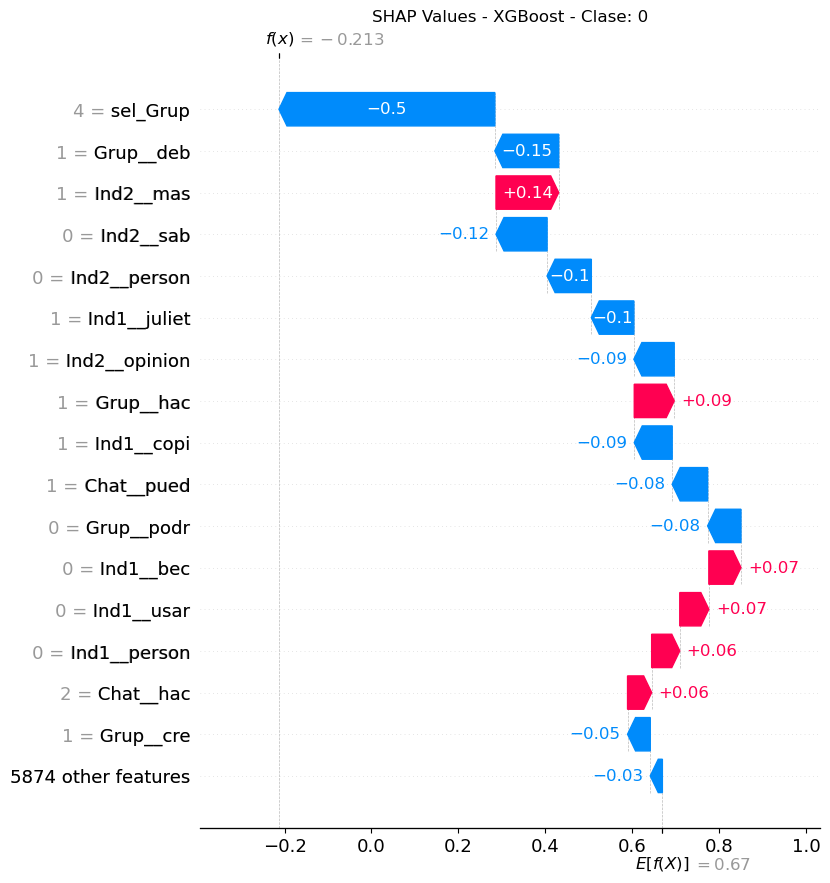

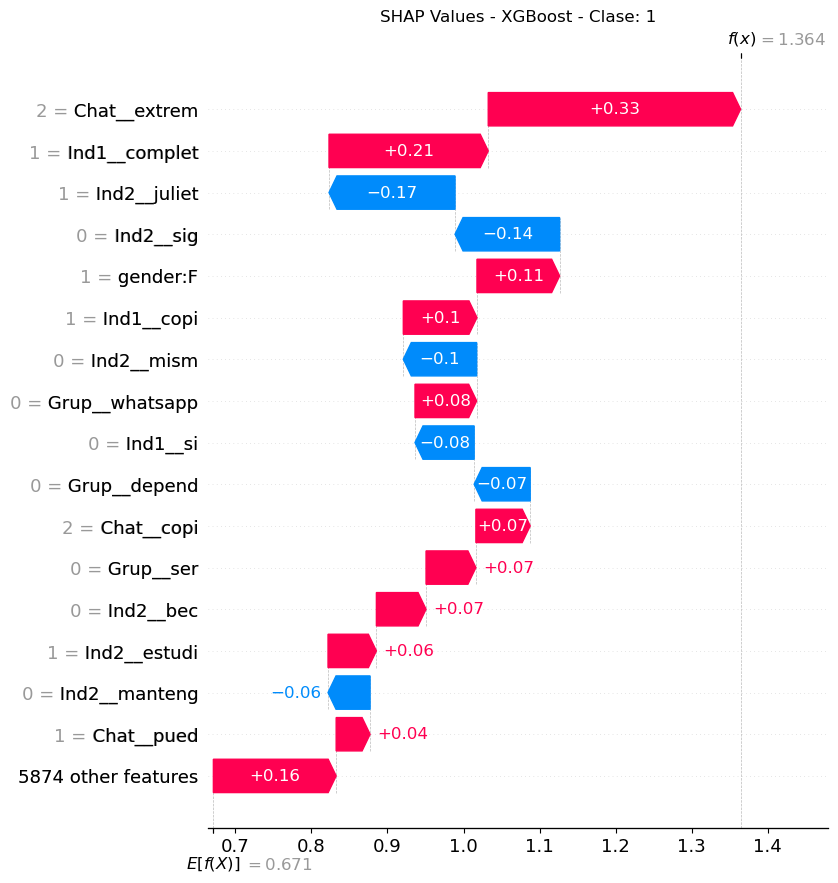

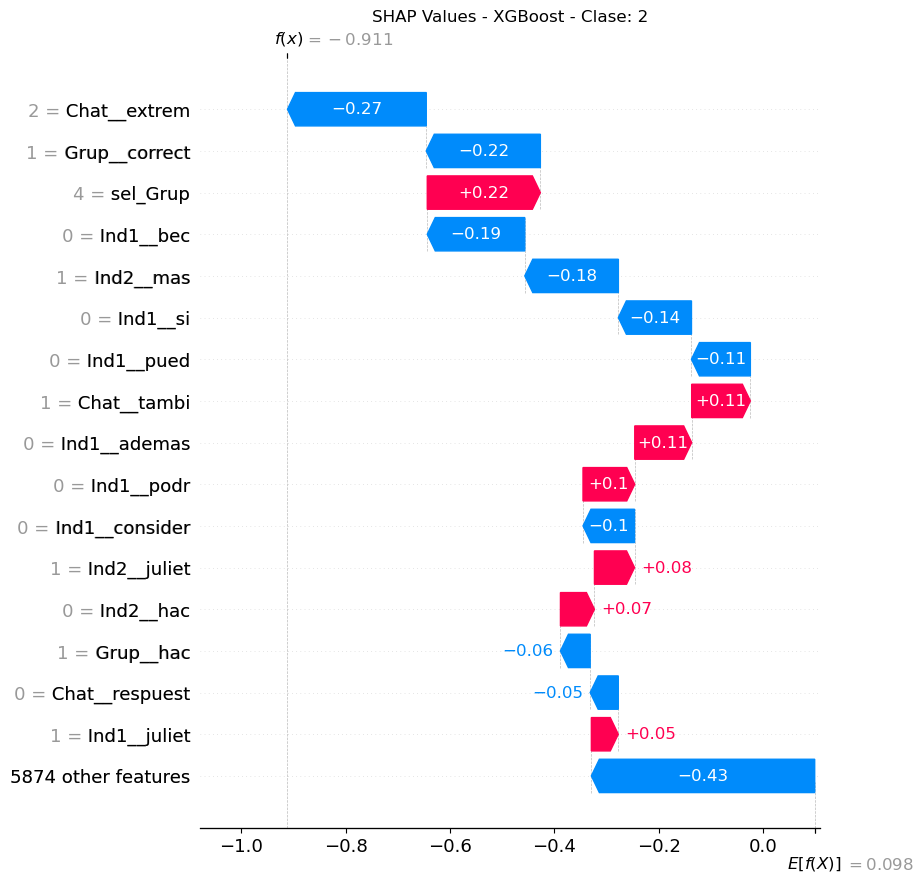

In [29]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')

## Modelo 4. Quitar justificación individual 2

In [30]:
df_train, df_test, y_train, y_test, categorical_preprocessing, text_preprocessing = preprocessing(
    dataset,
    gender=True, 
    comment_Ind2=False, 
    sel_Ind1=True
)
df_train

sel_Ind1  sel_Grup  gender:M  gender:F  gender:O  Ind1__1  Ind1__10  \
229       5.0       1.0       1.0       0.0       0.0        0         0   
700       4.0       4.0       0.0       1.0       0.0        0         0   
572       5.0       4.0       1.0       0.0       0.0        0         0   
436       1.0       1.0       1.0       0.0       0.0        0         0   
124       3.0       3.0       1.0       0.0       0.0        0         0   
..        ...       ...       ...       ...       ...      ...       ...   
26        5.0       3.0       1.0       0.0       0.0        0         0   
340       3.0       3.0       1.0       0.0       0.0        0         0   
17        0.0       3.0       1.0       0.0       0.0        0         0   
667       1.0       2.0       1.0       0.0       0.0        0         0   
608       0.0       4.0       0.0       1.0       0.0        0         0   

     Ind1__100  Ind1__110  Ind1__2  ...  Chat__yaaa  Chat__yaap  Chat__yap  \
229          0          0        0  ...           0           0          0   
700          0          0        0  ...           0           0          0   
572          0          0        0  ...           0           0          0   
436          0          0        0  ...           0           0          0   
124          0          0        0  ...           0           0          0   
..         ...        ...      ...  ...         ...         ...        ...   
26           0          0        0  ...           0           0          0   
340          0          0        0  ...           0           0          0   
17           0          0        0  ...           0           0          0   
667          0          0        0  ...           0           0          0   
608          0          0        0  ...           0           0          0   

     Chat__yay  Chat__yend  Chat__yer  Chat__yes  Chat__yesss  Chat__yop  \
229          0           0          0          0            0          0   
700          0           0          0          0            0          0   
572          0           0          0          0            0          0   
436          0           0          1          0            0          0   
124          0           0          0          0            0          0   
..         ...         ...        ...        ...          ...        ...   
26           0           0          0          0            0          0   
340          0           0          0          0            0          0   
17           0           0          0          0            0          0   
667          0           0          0          0            0          0   
608          0           0          0          0            0          0   

     Chat__zapat  
229            0  
700            0  
572            0  
436            0  
124            0  
..           ...  
26             0  
340            0  
17             0  
667            0  
608            0  

[563 rows x 4380 columns]

In [31]:
categorical_preprocessing

ColumnTransformer(transformers=[('sel_etapa',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['sel_Ind1', 'sel_Grup', 'sel_Ind2']),
                                ('gender',
                                 Pipeline(steps=[('extract',
                                                  ColumnExtractor(columns=['gender'])),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(categories=[['M',
                                                                             'F',
                                                                             'O']],
                                                                sparse_output=False))]),
                                 ['gender'])])

In [32]:
text_preprocessing

ColumnTransformer(transformers=[('Ind1',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94259DB0>),
                                 'comment_Ind1'),
                                ('Grup',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94259DB0>),
                                 'comment_Grup'),
                                ('Chat',
                                 CountVectorizer(token_pattern=None,
                                                 tokenizer=<utils.StemmerTokenizer object at 0x0000027A94259DB0>),
                                 'summary')])

In [33]:
dummy_model, rf_best_model, xgb_best_model = train_models(df_train, df_test, y_train, y_test, grid_rf, grid_xgb)

Dummy classifier
              precision    recall  f1-score   support

        -1.0       0.40      1.00      0.57        56
         0.0       0.00      0.00      0.00        54
         1.0       0.00      0.00      0.00        31

    accuracy                           0.40       141
   macro avg       0.13      0.33      0.19       141
weighted avg       0.16      0.40      0.23       141

Random Forest classifier
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        -1.0       0.58      0.66      0.62        56
         0.0       0.44      0.59      0.51        54
         1.0       0.60      0.10      0.17        31

    accuracy                           0.51       141
   macro avg       0.54      0.45      0.43       141
weighted avg       0.53      0.51      0.48       141

XGBoost classifier
Best Hyperparameters: {'max_leaves': 100, 'min_child_weight': 1, 'n_e

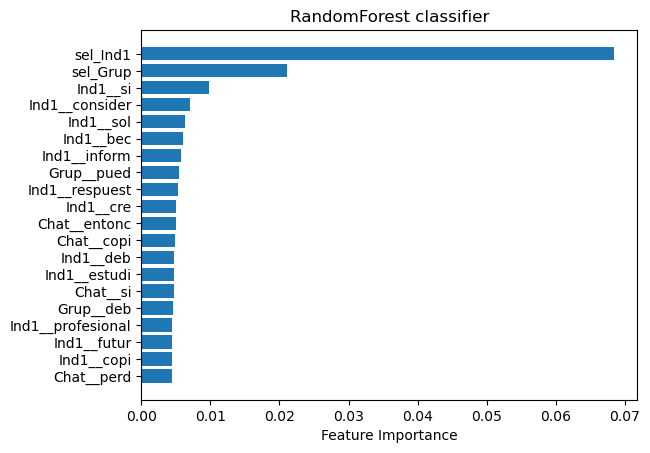

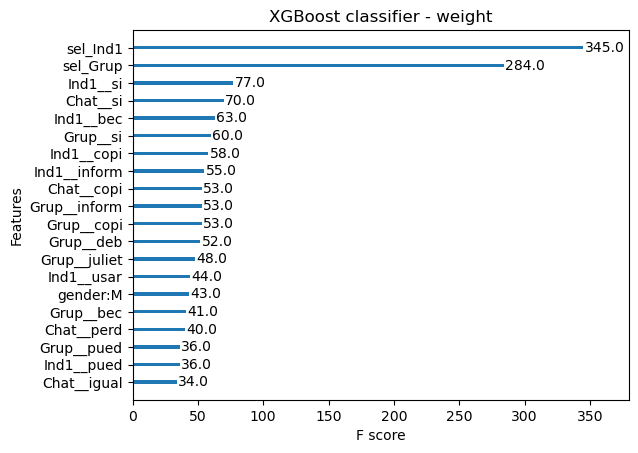

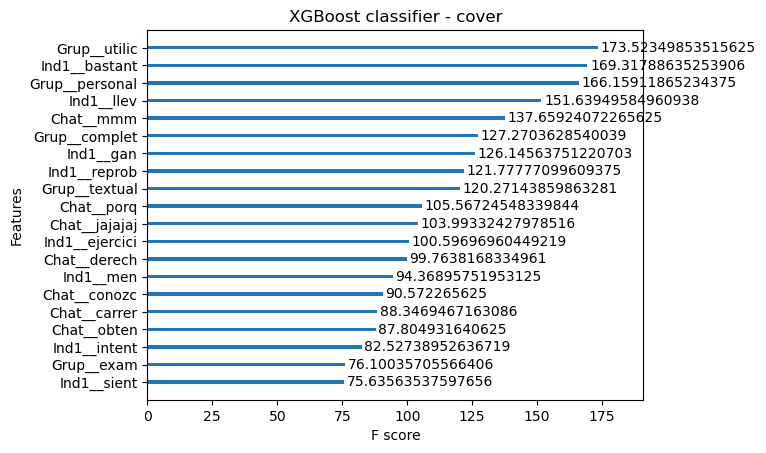

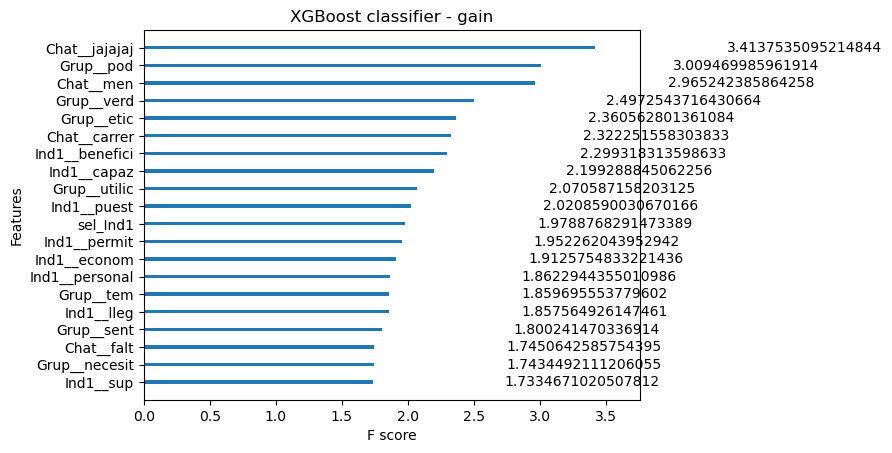

In [34]:
plot_importance_models(rf_best_model, xgb_best_model)

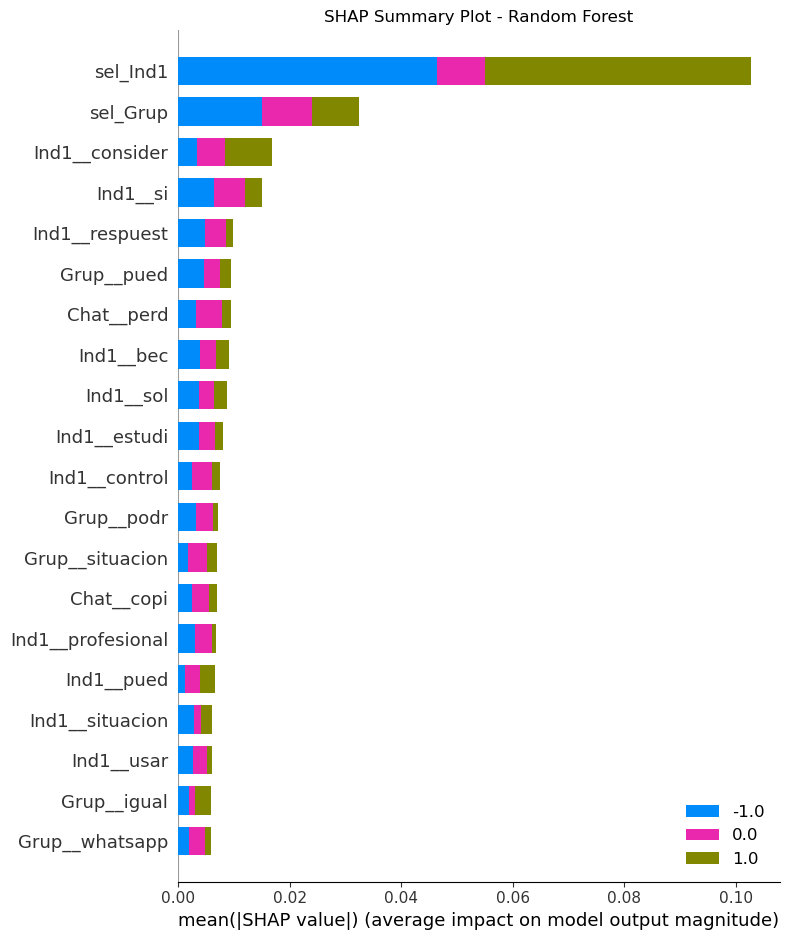

In [35]:
summary_plot(rf_best_model, df_train, 'SHAP Summary Plot - Random Forest')

[03:41:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


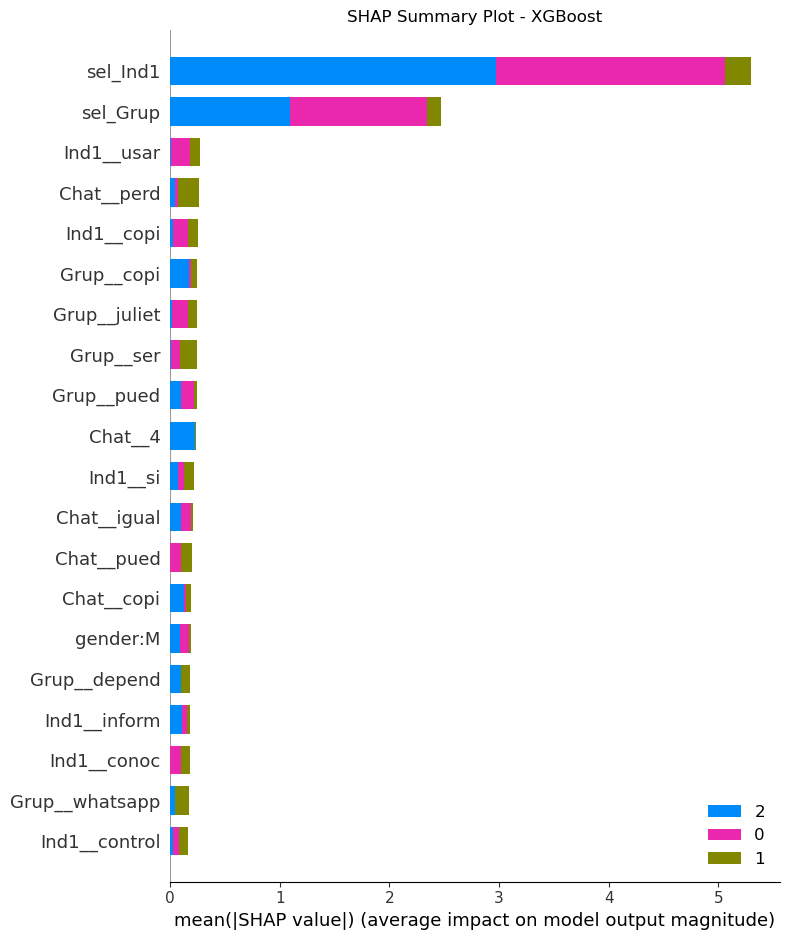

In [36]:
summary_plot(xgb_best_model, df_train, 'SHAP Summary Plot - XGBoost')

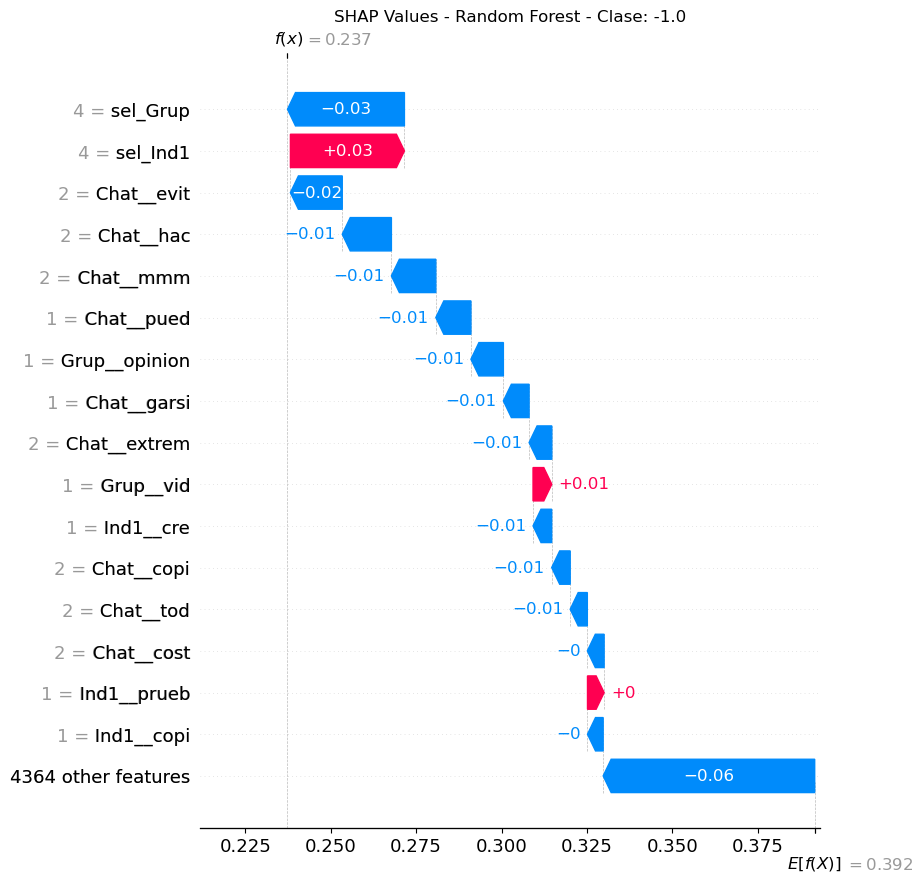

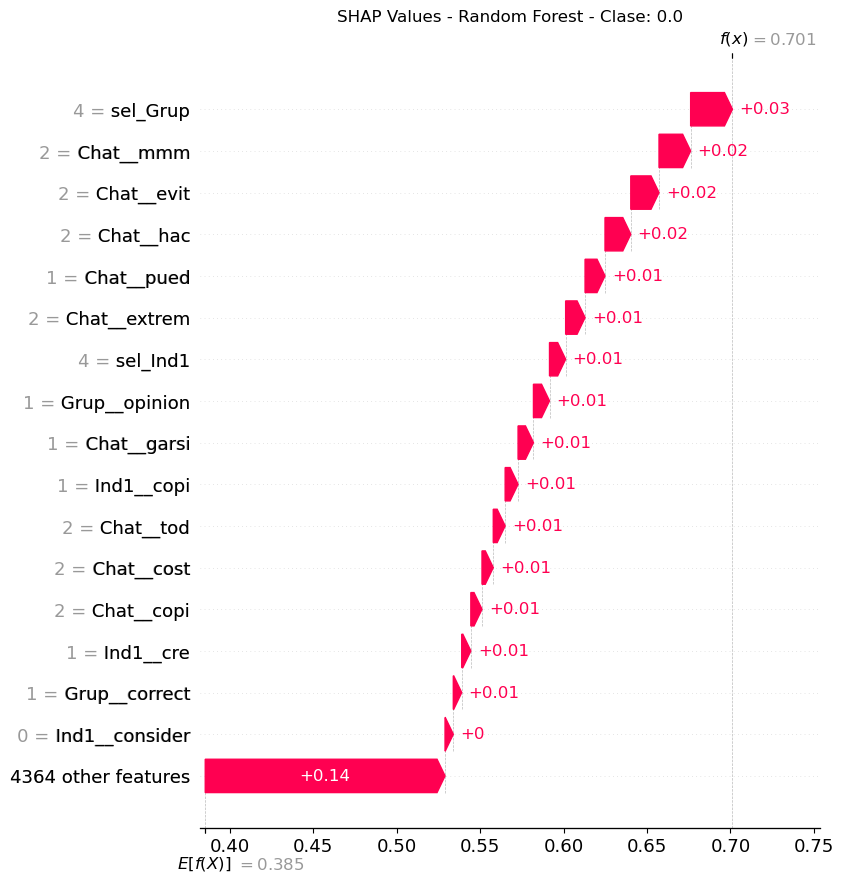

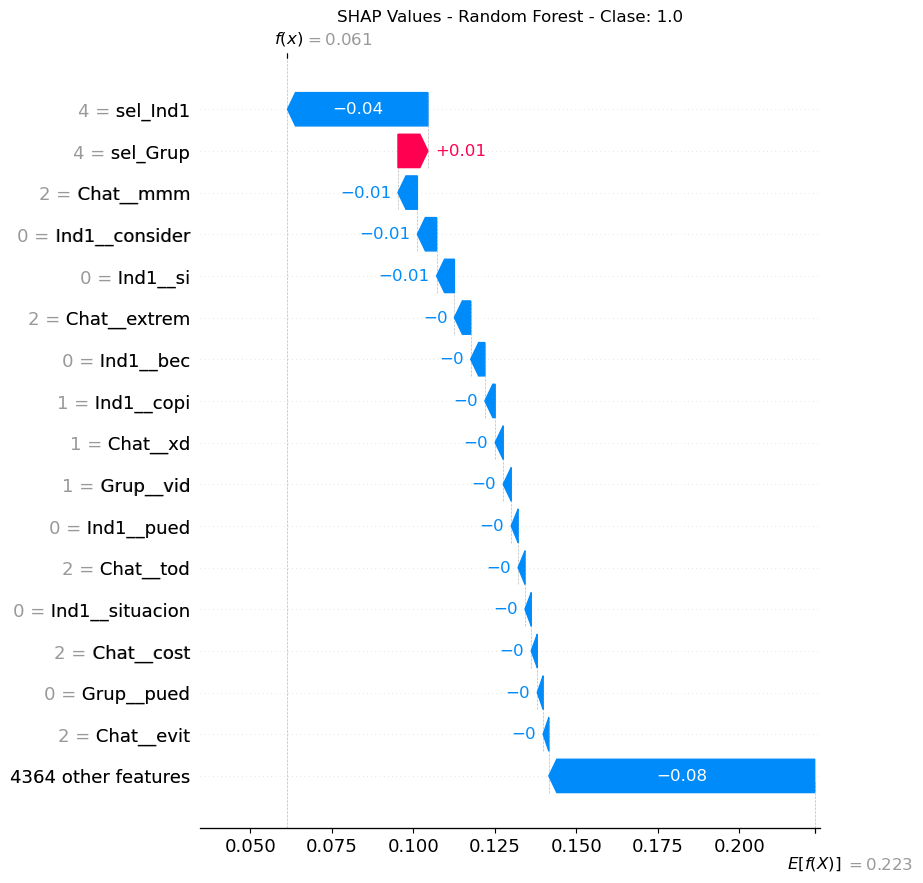

In [37]:
idx=1

individual_explanation(idx, rf_best_model, df_train, 'SHAP Values - Random Forest')

[03:41:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


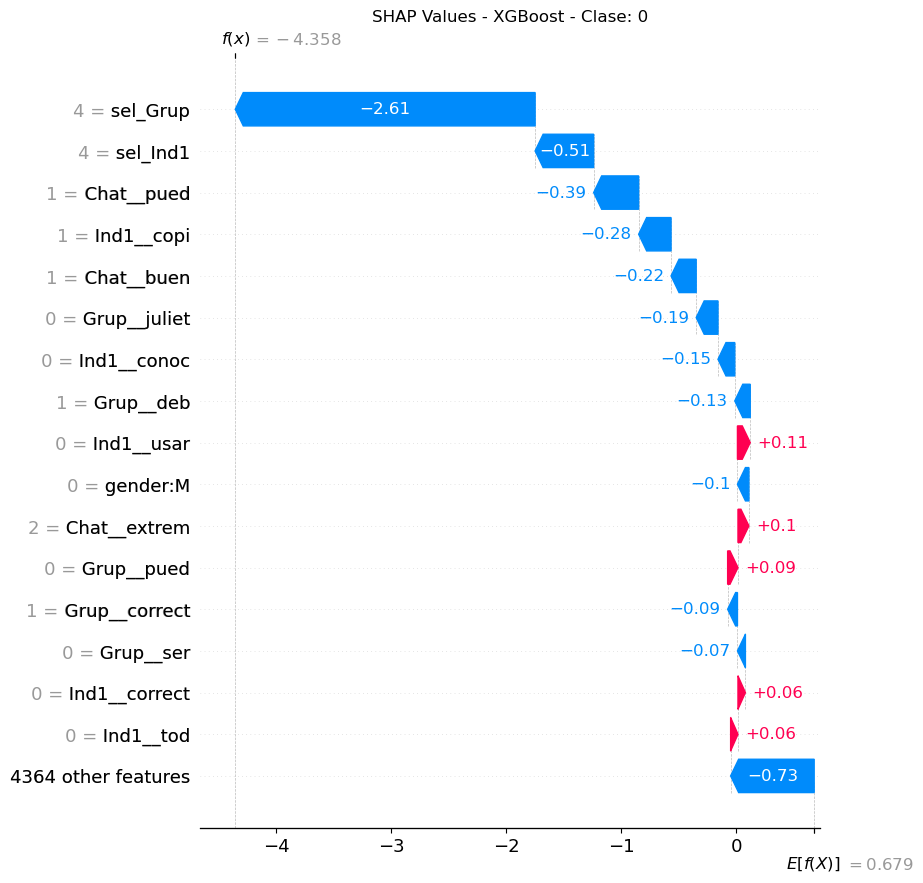

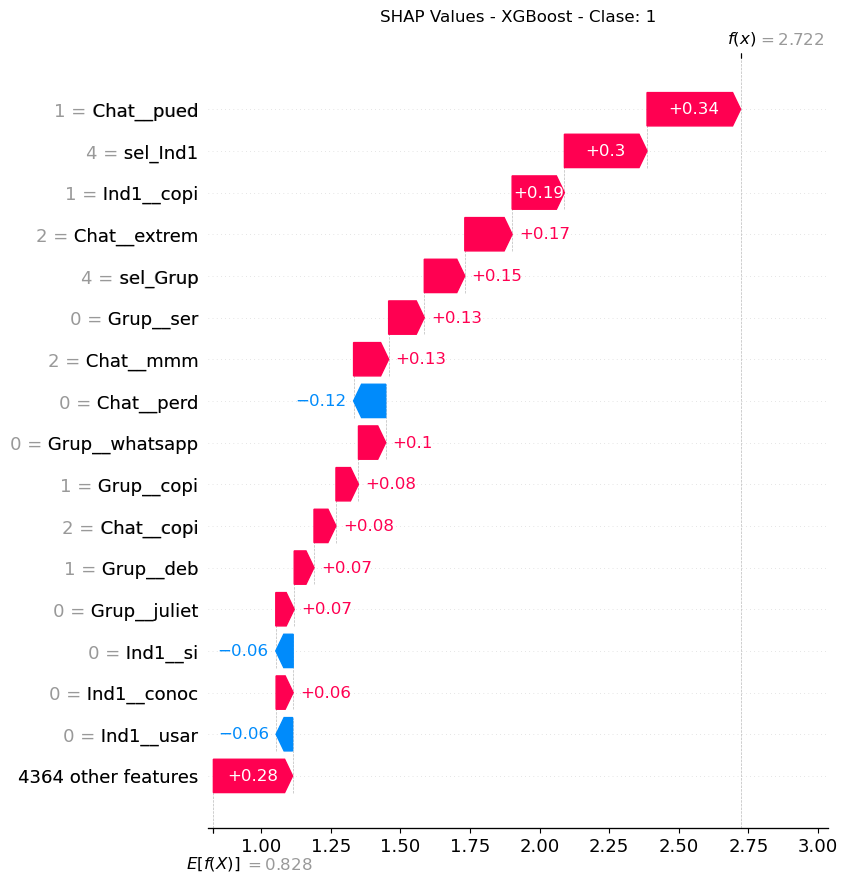

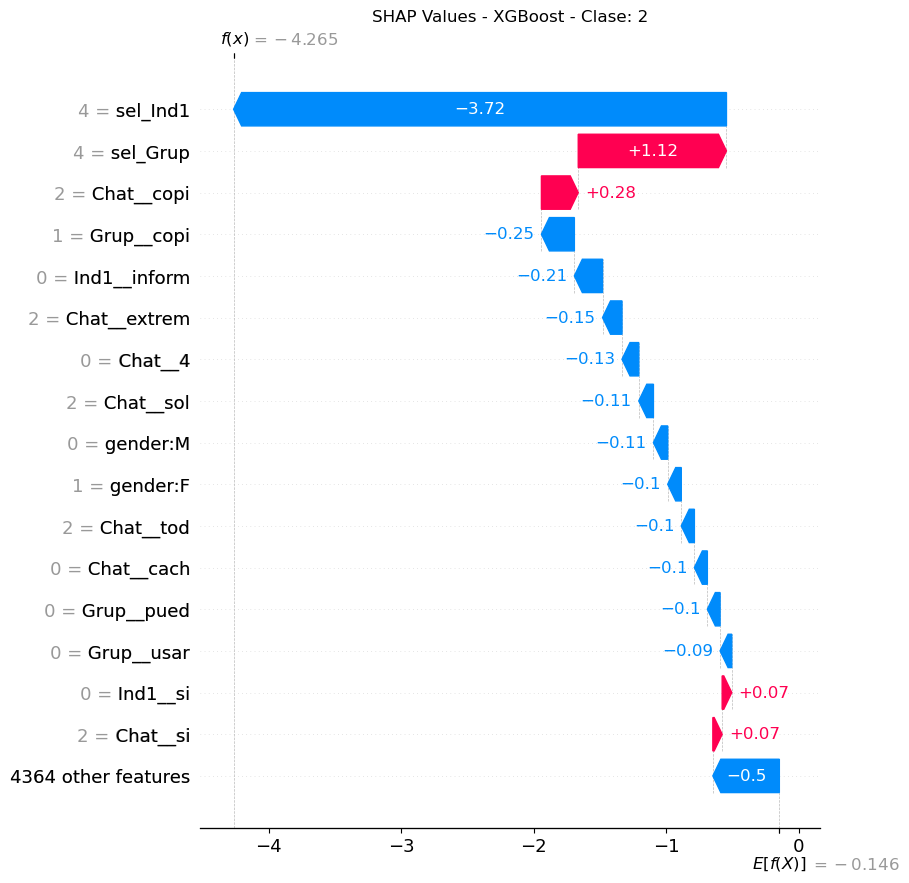

In [38]:
idx=1

individual_explanation(idx, xgb_best_model, df_train, 'SHAP Values - XGBoost')